## Import the Dependencies

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,accuracy_score
import sklearn.metrics as metrics
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn import tree

In [4]:
# Load the dataset 
url='C:\\Users\\Durga P T M\\BA_A_Python_Sem2\\Datasets\\winequality-red.csv'
wine=pd.read_csv(url)

In [5]:
# Display the number of rows and columns
wine.shape

(1599, 12)

In [6]:
#Display the first 5 rows of the dataset
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [7]:
#Check for number of missing values in each columns
wine.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [8]:
#Checking the statistical measures of the dataset
wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [9]:
#Finding correlation between different features(columns) of the dataset
corr=wine.corr()

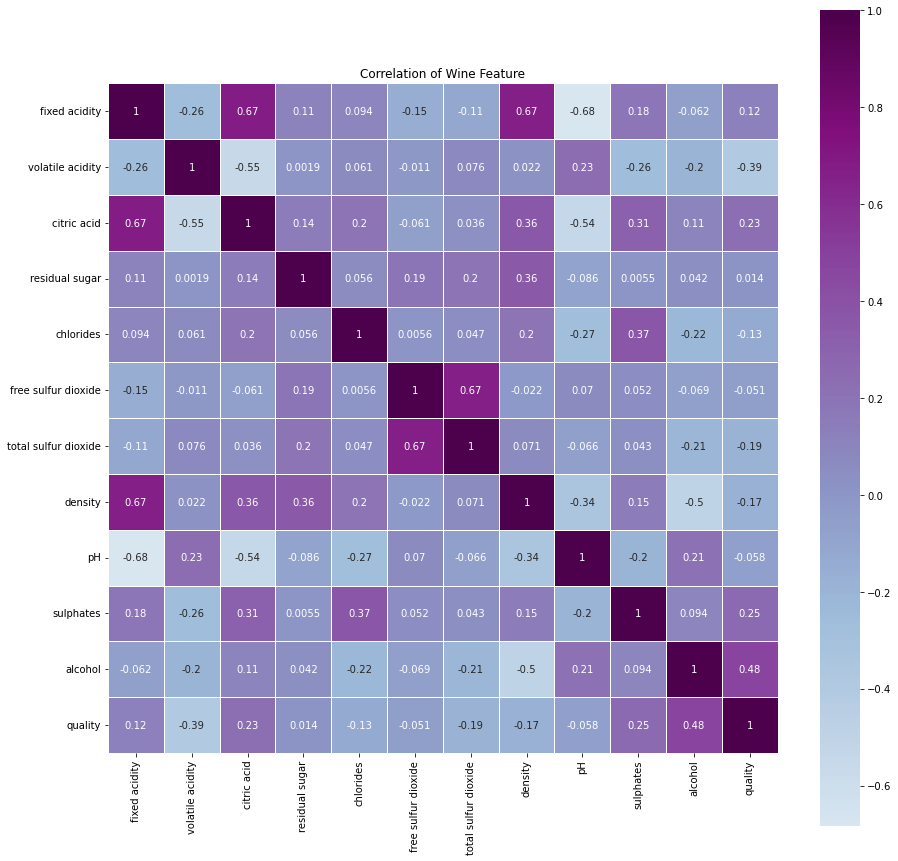

In [10]:
#Plotting a heatmap to understand the correlation between the features(columns)
plot=plt.figure(figsize=(15,15))
sns.heatmap(corr, cmap="BuPu",center=0,square=True, linewidths=.5, annot=True)
plt.title("Correlation of Wine Feature")
plt.show()

In [11]:
#Display the correlation values
wine.corr()['quality'].sort_values(ascending=False)

quality                 1.000000
alcohol                 0.476166
sulphates               0.251397
citric acid             0.226373
fixed acidity           0.124052
residual sugar          0.013732
free sulfur dioxide    -0.050656
pH                     -0.057731
chlorides              -0.128907
density                -0.174919
total sulfur dioxide   -0.185100
volatile acidity       -0.390558
Name: quality, dtype: float64

In [12]:
#Separate the features and target columns (quality)
X=wine.drop(['quality','residual sugar'],axis=1)

In [13]:
print(X)

      fixed acidity  volatile acidity  citric acid  chlorides  \
0               7.4             0.700         0.00      0.076   
1               7.8             0.880         0.00      0.098   
2               7.8             0.760         0.04      0.092   
3              11.2             0.280         0.56      0.075   
4               7.4             0.700         0.00      0.076   
...             ...               ...          ...        ...   
1594            6.2             0.600         0.08      0.090   
1595            5.9             0.550         0.10      0.062   
1596            6.3             0.510         0.13      0.076   
1597            5.9             0.645         0.12      0.075   
1598            6.0             0.310         0.47      0.067   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                    11.0                  34.0  0.99780  3.51       0.56   
1                    25.0                  67.0  0.99680  3.20   

In [14]:
# Categorizing target column(quality) data to binary values
Y=wine['quality'].apply(lambda y_value: 1 if y_value>=6.5 else 0)

In [15]:
print(Y)

0       0
1       0
2       0
3       0
4       0
       ..
1594    0
1595    0
1596    0
1597    0
1598    0
Name: quality, Length: 1599, dtype: int64


### Training the model

In [16]:
train_x,test_x,train_y,test_y=train_test_split(X,Y,test_size=.2,random_state=42)

In [17]:
print("The first five samples in train set is {}".format(train_x.shape[0]))
print("The number of samples in test set is {}".format(test_x.shape[0]))

The first five samples in train set is 1279
The number of samples in test set is 320


### Logistic Regression

In [18]:
#Instance of Logistic Regression model
lr=LogisticRegression()

In [19]:
#Training the model through fit function
lr.fit(train_x,train_y)

C:\Users\Durga P T M\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [20]:
#Predicted values
lr_pred_y=lr.predict(test_x)

In [21]:
print(lr_pred_y)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0
 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0
 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0]


In [22]:
print("The first five prediction {}".format(lr_pred_y[:5]))

The first five prediction [0 0 0 0 0]


In [23]:
# Finding the accuracy of the predicted values
test_data_accuracy=accuracy_score(test_y,lr_pred_y)*100
print("Test data accuracy:",test_data_accuracy)

Test data accuracy: 86.25


In [24]:
cf_matrix = confusion_matrix(test_y,lr_pred_y)
print(cf_matrix)

[[264   9]
 [ 35  12]]


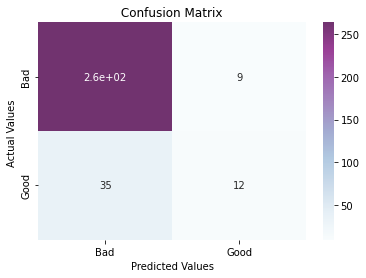

In [25]:
# Drawing a confusion matrix of  wine dataset (comparing actual with predicted)
# To understand the performance of the model

ax = sns.heatmap(cf_matrix, annot=True, cmap='BuPu',alpha=0.8)
ax.set_title(' Confusion Matrix ');
ax.set_xlabel('Predicted Values')
ax.set_ylabel('Actual Values ');
ax.xaxis.set_ticklabels(['Bad','Good'])
ax.yaxis.set_ticklabels(['Bad','Good'])
plt.show()

#### Decision Tree

In [26]:
dtree =tree.DecisionTreeClassifier()
dtree = dtree.fit(train_x,train_y)
dtree_pred_y=dtree.predict(test_x)
print(dtree_pred_y)

[0 0 1 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 0 0 0 0
 0 0 0 0 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0
 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0
 1 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 0
 0 0 0 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0
 0 1 0 0 0 0 0 0 0 1 1 0 0 1 0 0 0 0 0 0 0 0 0 0]


In [27]:
train_data_accuracy=accuracy_score(test_y,dtree_pred_y)*100
print("Training data accuracy:",train_data_accuracy)

Training data accuracy: 88.75


#### RandomForest

In [28]:
rf =RandomForestClassifier()
rf = rf.fit(train_x,train_y)
rf_pred_y=rf.predict(test_x)
print(rf_pred_y)

[0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 0 0 0 0
 0 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 1
 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0
 1 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 1 0 0 0 0 0 1 1 0 0 0
 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0]


In [29]:
train_data_accuracy=accuracy_score(test_y,rf_pred_y)*100
print("Training data accuracy:",train_data_accuracy)

Training data accuracy: 89.375


In [42]:
lr_proba = lr.predict_proba(test_x)[:,1]

In [43]:
print(lr_proba)

[0.02892231 0.00704436 0.0671102  0.03967624 0.10289681 0.02152518
 0.00485489 0.02095679 0.10297548 0.08886683 0.39561322 0.02568059
 0.05078088 0.0226751  0.03894744 0.57395806 0.01189956 0.05829673
 0.62812796 0.01985811 0.0465635  0.0195808  0.16944867 0.43488425
 0.03261757 0.03836239 0.38428434 0.02948485 0.01025958 0.28039116
 0.02008865 0.06361743 0.1173667  0.04439437 0.03648434 0.00845068
 0.33662541 0.08657915 0.08390467 0.36359249 0.06578491 0.01571398
 0.32917629 0.00811089 0.19847066 0.10448678 0.44864991 0.06734987
 0.01515435 0.06331835 0.00690505 0.0417122  0.07334541 0.23506322
 0.00836435 0.00838579 0.21096642 0.03978646 0.12582197 0.0274692
 0.05551114 0.19422554 0.03115735 0.02744497 0.50970445 0.04027945
 0.49501154 0.02132845 0.4890299  0.01988915 0.46273731 0.00385426
 0.12735685 0.13136371 0.31988154 0.02590211 0.53298959 0.10510415
 0.18106286 0.39997726 0.02923818 0.50775127 0.03256262 0.11369039
 0.06344622 0.37002373 0.02475241 0.12845333 0.35947996 0.02307

### Plotting ROC Curve



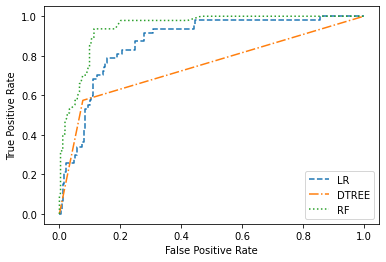

In [28]:
lr_proba = lr.predict_proba(test_x)[::,1]
dtree_proba = dtree.predict_proba(test_x)[::,1]
rf_proba = rf.predict_proba(test_x)[::,1]
fpr1, tpr1, _ = metrics.roc_curve(test_y, lr_proba)
fpr2, tpr2, _ = metrics.roc_curve(test_y, dtree_proba)
fpr3, tpr3, _ = metrics.roc_curve(test_y, rf_proba)
#create ROC curve for decision tree 
plt.plot(fpr1, tpr1, linestyle='--', label='LR') 
plt.plot(fpr2, tpr2,linestyle='-.', label='DTREE')
plt.plot(fpr3, tpr3,linestyle=':', label='RF')

# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
plt.show()


In [41]:
auc1 = metrics.roc_auc_score(test_y, lr_proba)
print('LR: ROC AUC=%.3f' % (auc1))
auc2 = metrics.roc_auc_score(test_y, dtree_proba)
print('DTREE: ROC AUC=%.3f' % (auc2))
auc3 = metrics.roc_auc_score(test_y, rf_proba)
print('RF: ROC AUC=%.3f' % (auc3))

LR: ROC AUC=0.871
DTREE: ROC AUC=0.749
RF: ROC AUC=0.944
